<a href="https://colab.research.google.com/github/gpasxos/large-scale-optimization/blob/main/ch05_projection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

def project_box(y, lower, upper):
    """Project onto box constraints [lower, upper]."""
    return np.clip(y, lower, upper)

def project_l2_ball(y, radius=1.0):
    """Project onto l2 ball of given radius."""
    norm_y = np.linalg.norm(y)
    if norm_y <= radius:
        return y
    return radius * y / norm_y

def project_simplex(y):
    """Project onto probability simplex {x >= 0, sum(x) = 1}."""
    n = len(y)
    # Sort in descending order
    y_sorted = np.sort(y)[::-1]

    # Find rho
    cumsum = np.cumsum(y_sorted)
    rho = np.where(y_sorted - (cumsum - 1) / np.arange(1, n+1) > 0)[0][-1] + 1

    # Compute threshold
    tau = (cumsum[rho-1] - 1) / rho

    return np.maximum(y - tau, 0)

def project_affine(y, A, b):
    """Project onto affine set {x : Ax = b}."""
    # x = y - A^T (A A^T)^{-1} (Ay - b)
    residual = A @ y - b
    correction = np.linalg.solve(A @ A.T, residual)
    return y - A.T @ correction

# Test projections
np.random.seed(42)
y = np.array([0.5, 1.2, -0.3, 0.8])

print("Original y:", y)
print("Box [0,1]:", project_box(y, 0, 1))
print("L2 ball r=1:", project_l2_ball(y))
print("Simplex:", project_simplex(y))
print("Sum of simplex projection:", project_simplex(y).sum())

Original y: [ 0.5  1.2 -0.3  0.8]
Box [0,1]: [0.5 1.  0.  0.8]
L2 ball r=1: [ 0.32141217  0.77138922 -0.1928473   0.51425948]
Simplex: [0.  0.7 0.  0.3]
Sum of simplex projection: 1.0


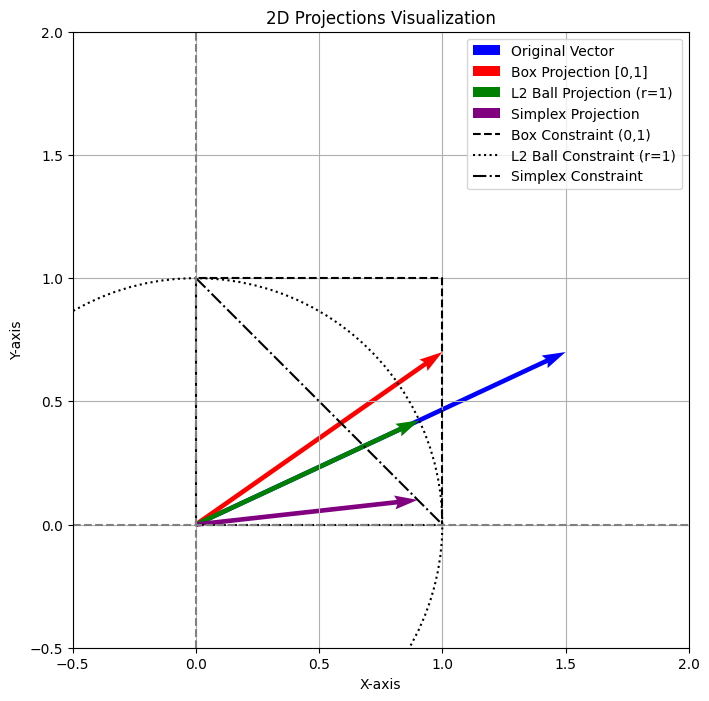

In [2]:
import matplotlib.pyplot as plt

# Generate a 2D vector for visualization
y_2d = np.array([1.5, 0.7])

# Calculate projections
proj_box_2d = project_box(y_2d, 0, 1)
proj_l2_ball_2d = project_l2_ball(y_2d, radius=1.0)
proj_simplex_2d = project_simplex(y_2d)

# Create the plot
plt.figure(figsize=(8, 8))
plt.quiver(0, 0, y_2d[0], y_2d[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Original Vector')
plt.quiver(0, 0, proj_box_2d[0], proj_box_2d[1], angles='xy', scale_units='xy', scale=1, color='red', label='Box Projection [0,1]')
plt.quiver(0, 0, proj_l2_ball_2d[0], proj_l2_ball_2d[1], angles='xy', scale_units='xy', scale=1, color='green', label='L2 Ball Projection (r=1)')
plt.quiver(0, 0, proj_simplex_2d[0], proj_simplex_2d[1], angles='xy', scale_units='xy', scale=1, color='purple', label='Simplex Projection')

# Plot the constraints for better understanding
# Box constraint [0,1]x[0,1]
plt.plot([0, 1, 1, 0, 0], [0, 0, 1, 1, 0], 'k--', label='Box Constraint (0,1)')

# L2 Ball constraint (r=1)
theta = np.linspace(0, 2 * np.pi, 100)
x_circle = 1 * np.cos(theta)
y_circle = 1 * np.sin(theta)
plt.plot(x_circle, y_circle, 'k:', label='L2 Ball Constraint (r=1)')

# Simplex constraint (x + y = 1, x >= 0, y >= 0)
plt.plot([0, 1], [1, 0], 'k-.', label='Simplex Constraint')

plt.xlim(-0.5, 2.0)
plt.ylim(-0.5, 2.0)
plt.axvline(0, color='gray', linestyle='--')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2D Projections Visualization')
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()